In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
#트레인 데이타셋 레이블 구성

caltech_dir = "./data/hw5/train"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
  
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(cat)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)# 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy = (X_train, X_test, y_train, y_test)
np.save("./data/hw5/shose_train.npy", xy)

adidas  파일 길이 :  237
adidas  :  ./data/hw5/train/adidas\100.jpg
converse  파일 길이 :  237
converse  :  ./data/hw5/train/converse\100.jpg
nike  파일 길이 :  237
nike  :  ./data/hw5/train/nike\100.jpg


In [4]:
# 테스트셋 전처리

caltech_dir = "./data/hw5/test"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(cat)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True) # 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy1 = (X_train, X_test, y_train, y_test)
np.save("./data/hw5/shose_test.npy", xy1)

adidas  파일 길이 :  38
adidas  :  ./data/hw5/test/adidas\0.jpg
converse  파일 길이 :  38
converse  :  ./data/hw5/test/converse\0.jpg
nike  파일 길이 :  38
nike  :  ./data/hw5/test/nike\0.jpg


In [3]:
# 기본 데이타 셋 확정

X_train, X_valid, y_train, y_valid = np.load("./data/hw5/shose_train.npy",allow_pickle=True)


X_2, X_test, y_2, y_test = np.load("./data/hw5/shose_test.npy",allow_pickle=True)
X_test = np.append(X_test,X_2,axis=0)
y_test = np.append(y_test,y_2,axis=0)

In [478]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

print(y_test)

(639, 240, 240, 3)
(114, 240, 240, 3)
(72, 240, 240, 3)
(639,)
(114,)
(72,)
['adidas' 'adidas' 'nike' 'adidas' 'nike' 'converse' 'converse' 'adidas'
 'nike' 'converse' 'nike' 'adidas' 'converse' 'converse' 'adidas'
 'converse' 'nike' 'nike' 'nike' 'converse' 'nike' 'converse' 'converse'
 'adidas' 'converse' 'adidas' 'nike' 'adidas' 'nike' 'converse' 'adidas'
 'adidas' 'adidas' 'converse' 'adidas' 'adidas' 'adidas' 'adidas'
 'converse' 'adidas' 'converse' 'converse' 'converse' 'converse' 'nike'
 'adidas' 'converse' 'converse' 'adidas' 'adidas' 'nike' 'nike' 'nike'
 'converse' 'nike' 'converse' 'nike' 'nike' 'nike' 'converse' 'nike'
 'converse' 'nike' 'adidas' 'converse' 'nike' 'converse' 'adidas' 'adidas'
 'nike' 'nike' 'converse' 'adidas' 'nike' 'converse' 'nike' 'converse'
 'adidas' 'adidas' 'nike' 'nike' 'adidas' 'nike' 'nike' 'nike' 'converse'
 'converse' 'adidas' 'nike' 'nike' 'converse' 'adidas' 'converse' 'nike'
 'adidas' 'converse' 'nike' 'nike' 'converse' 'nike' 'nike' 'adidas'

In [4]:
# 라벨 원-핫 인코딩

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
 
categories = ["adidas", "converse", "nike"]

token = Tokenizer()
token.fit_on_texts(y_test)

token1 = Tokenizer()
token1.fit_on_texts(y_train)

token2 = Tokenizer()
token2.fit_on_texts(y_valid)
#print('word index: {}'.format(token.word_index))
y_ = token.texts_to_sequences(y_test)
y_1 = token1.texts_to_sequences(y_train)
y_2 = token2.texts_to_sequences(y_valid)

y_test = tf.keras.utils.to_categorical(y_, len(token.word_index) +1 ) # 길이를 줘야하는데 벡터 맨 앞에 0이 필요해서 한 칸 더 추가.
y_train = tf.keras.utils.to_categorical(y_1, len(token1.word_index)+1 )
y_valid = tf.keras.utils.to_categorical(y_2, len(token2.word_index) +1)
# y_test = to_categorical(y_test)
# y_train = to_categorical(y_train)
# y_valid = to_categorical(y_valid)

print(y_test.shape)
print(y_train.shape)
print(type(y_valid))

(114, 4)
(639, 4)
<class 'numpy.ndarray'>


In [480]:
print(y_test)
y_test = y_test[:,1:]
y_train = y_train[:,1:]
y_valid = y_valid[:,1:]

print(y_test)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0.

In [6]:
# 뻥튀기

train_data = ImageDataGenerator(
    rescale=1/255.0,
    samplewise_center=True,
    featurewise_std_normalization = True,
    samplewise_std_normalization=True,
  
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=None
)
valid_data = ImageDataGenerator(
    rescale=1/255.0)

In [7]:
X_train_gen = train_data.flow(x=X_train, y=y_train, batch_size=16, shuffle=True)
X_valid_gen= valid_data.flow(x=X_valid, y=y_valid )
X_test_gen = valid_data.flow(x=X_test, y=y_test )

c:\Users\box15\anaconda3\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\box15\anaconda3\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for 

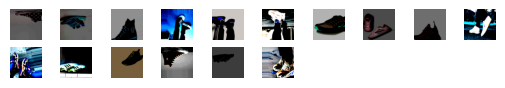

In [8]:
import cv2
augs = X_train_gen.__getitem__(8)

plt.figure()
for i, img in enumerate(augs[0]):
    plt.subplot(10, 10, i+1)
    plt.axis('off')

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

In [453]:
dir(X_train_gen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'batch_index',
 'batch_size',
 'data_format',
 'dtype',
 'image_data_generator',
 'index_array',
 'index_generator',
 'lock',
 'n',
 'next',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'seed',
 'shuffle',
 'total_batches_seen',
 'white_list_formats',
 'x',
 'x_misc',
 'y']

In [489]:
# 모델 구현 및 학습

# Simple deep learning model
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = (240, 240, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = './data/model/shose_cnn_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
model.summary()

history = model.fit_generator(X_train_gen , validation_data = X_valid_gen,epochs = 30,   verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 119, 119, 16)     0         
 g2D)                                                            
                                                                 
 dropout_136 (Dropout)       (None, 119, 119, 16)      0         
                                                                 
 conv2d_105 (Conv2D)         (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 dropout_137 (Dropout)       (None, 58, 58, 32)      

C:\Users\box15\AppData\Local\Temp\ipykernel_10028\3528702731.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(X_train_gen , validation_data = X_valid_gen,epochs = 30,   verbose = 0, callbacks = [early_stopping_callback, checkpointer])
c:\Users\box15\anaconda3\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\box15\anaconda3\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



Epoch 1: val_loss improved from inf to 1.09828, saving model to ./data/model\shose_cnn_best_model.hdf5

Epoch 2: val_loss improved from 1.09828 to 1.09753, saving model to ./data/model\shose_cnn_best_model.hdf5


KeyboardInterrupt: 